## resource dependent 环境下的仿真


In [1]:
# 没有未来预期的qlearning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

(0.0, 1.0)

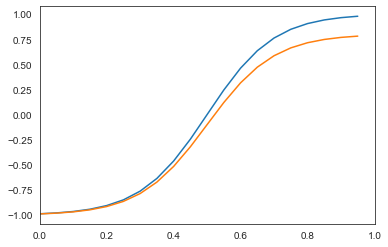

In [2]:
x=np.arange(0,1,0.05)
y=2./(1.0+np.exp(-10*(x-0.5)))-1
y1=1.8/(1.0+np.exp(-10*(x-0.5)))-1
plt.plot(x,y)
plt.plot(x,y1)
plt.xlim(0,1)

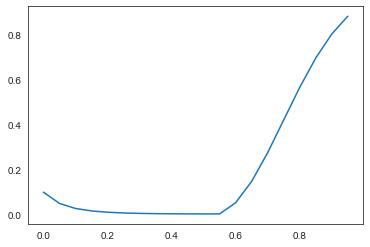

In [3]:
n=0.1
n_list=[]
k1=1
for x in np.arange(0,1,0.05):
    n_list.append(n)
    if x>0.5:
        deltan=k1*(1-n)*(x-0.5)
    else:
        deltan=k1*n*(x-0.5)
    n=deltan+n
    
xx=np.arange(0,1,0.05)
plt.plot(xx,n_list)

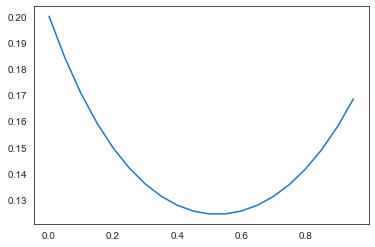

In [4]:
n=0.2
n_list=[]
k1=0.2
for x in np.arange(0,1,0.05):
    n_list.append(n)
    
    deltan=k1*n*(1-n)*(x-0.5)
    
    n=deltan+n
    
xx=np.arange(0,1,0.05)
plt.plot(xx,n_list)

In [5]:
class Agent():  # 当前行动 self.action;当前收益 self.reward;累积收益cul_reward;
    # 历史收益reward——history；历史行动 his_action
    # q表；历史q表q0_his;q1_his

    def __init__(self, learning_rate, **kwargs):

        self.learning_rate = learning_rate
        self.action_space = [0, 1]
        self.q = np.array([0., 0.])

        self.action = np.random.randint(0,2)
        self.reward = 0
        self.cul_reward=0.01

        self.reward_history = []
        self.action_history = []

        self.policy = kwargs['policy']
        self.epsilon = kwargs['epsilon'] if self.policy == 'e_greedy' else 0
        self.temperature = kwargs['temp'] if self.policy == 'boltzman' else 0
 

        self.q0_his = [0.]
        self.q1_his = [0.]


    def choose_action(self):
        if self.policy == 'e_greedy':
            if np.random.rand() < self.epsilon or ((self.q == 0).any()):

                action = np.random.choice(self.action_space, p=[0.5, 0.5])
            else:
                if abs(self.q[0]-self.q[1])<1e-7:
                     action = np.random.choice(self.action_space, p=[0.5, 0.5])
                else:
                    action = np.argmax(self.q)
        if self.policy == 'boltzman':
            tau = self.temperature
            p = np.exp(self.q / tau) / (np.sum(np.exp(self.q / tau)))
            action = np.random.choice(self.action_space, p=p.ravel())

        self.action = action
        
        return action

    def RL(self):
        self.action_history.append(self.action)
        self.reward_history.append(self.reward)
        self.cul_reward+=self.reward
        self.q[self.action] += self.learning_rate * (self.reward - self.q[self.action])
        self.q[self.action]=round(self.q[self.action],6)
        self.q0_his.append(self.q[0])
        self.q1_his.append(self.q[1])
    def reset(self):
        self.q = np.array([0., 0.])

        self.action = np.random.randint(0,2)
        self.reward = 0

        self.reward_history = []
        self.action_history = []



## 1 、resouce-dependent 环境

- 参数e,为什么为1,反而系统收敛于x=0,e取在0.1~0.5之间
N=100,n=0.4,k=0.25 ep=0.04,seed=12,lr=0.2

In [51]:

np.random.seed(0)
colors = ['r--', 'g-', 'b-.', 'y:']
c=0.2
total_round =5000
N = 100
n=0.4
k=0.25
deltan_list=[]
n_list=[]
pc_pro=[]
r_list=[]
agent_r_t=dict()
Agent_N = [Agent(learning_rate=0.2,
                 policy='e_greedy',
                 epsilon=0.04)
           for _ in range(N)]

for j in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    pc=1-sum(action_N)/N
    pc_pro.append(pc)
   
    deltan=k*n*(1-n)*(pc-0.5)

    n=n+deltan
    n_list.append(n)
    deltan_list.append(deltan)
    r=0
    agent_r_t[j]=[]
    for agent in Agent_N:
        if agent.action == 0 :
            agent.reward =(2.-c)/(1.0+np.exp(-10*(n-0.5)))-1 
        else:
            agent.reward = 2./(1.0+np.exp(-10*(n-0.5)))-1
        r+=agent.reward
        agent.RL()
        agent_r_t[j].append(agent.cul_reward)
    r_list.append(r/N)



In [52]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }


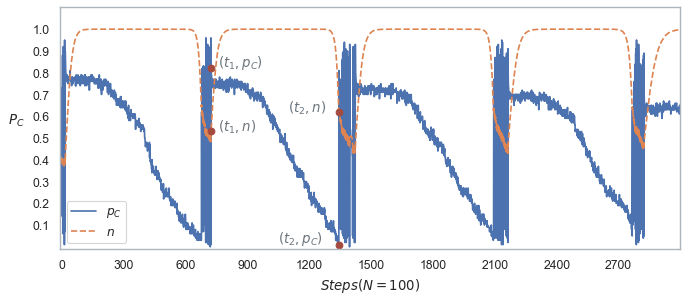

In [58]:
sns.set_style('white')

fig,ax0= plt.subplots(1, 1, figsize=(10,4), dpi=80)
times=3000
t1=725
t2=1344
ax0.plot(list(range(times)), pc_pro[:times],label='$p_C$')#,color='#1f77b4'
#ax0.plot(np.array(r_list[:times]),'-.')
ax0.plot(list(range(times)), n_list[:times],'--',label='$n$')


ax0.plot(t1,pc_pro[t1],color='#a44a3f',marker='o')#n
ax0.plot(t1,n_list[t1],color='#a44a3f',marker='o')#pc
ax0.plot(t2,pc_pro[t2]+0.01,color='#a44a3f',marker='o')#n
ax0.plot(t2,n_list[t2],color='#a44a3f',marker='o')# pc

ax0.text(760,0.53,'$(t_1,n)$',color='#6c757d',fontsize=12)
ax0.text(1100,0.62,'$(t_2,n)$',color='#6c757d',fontsize=12)
plt.text(760,0.83,'$(t_1,p_C)$',color='#6c757d',fontsize=12)
plt.text(1050,0.02,'$(t_2,p_C)$',color='#6c757d',fontsize=12)


plt.xticks(list(range(times))[::300],list(range(times))[::300])
plt.xlabel('$Steps(N=100)$',font)
plt.xlim(-5,times)
plt.ylim(-0.01,1.1)
plt.yticks(np.arange(0.1,1.1,0.1))
plt.ylabel('$P_C$',font,rotation=0,labelpad=15)

plt.legend(loc=3)

ax0.spines['right'].set_color('#adb5bd')
ax0.spines['bottom'].set_color('#adb5bd')
ax0.spines['left'].set_color('#adb5bd')
ax0.spines['top'].set_color('#adb5bd')
plt.savefig('oscillation in the RDE.pdf')
plt.show()

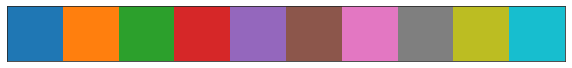

In [10]:
current_palette = sns.color_palette()
sns.palplot(current_palette)


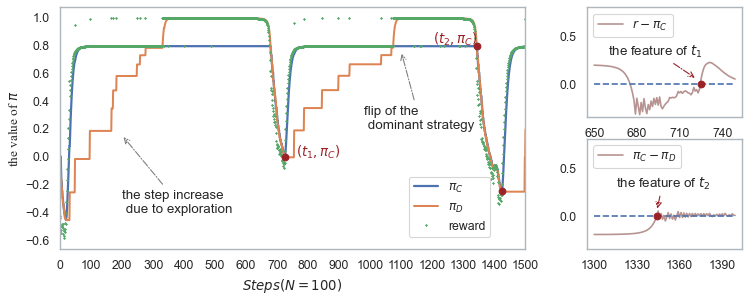

In [117]:
plt.figure(figsize=(11,4), dpi=80)
import matplotlib.gridspec
import matplotlib.patches as patches
times=1550
sns.set_style('white')
index=11
gs = matplotlib.gridspec.GridSpec(2, 2, 
                                  width_ratios=[3, 1],
                                  height_ratios=[1,1]) 
ax0 = plt.subplot(gs[:,0])
ax0.plot(Agent_N[index].q0_his[0:times],'-',label='$\pi_C$',linewidth=2)
ax0.plot(Agent_N[index].q1_his[0:times],'-',label='$\pi_D$',linewidth=1.8)
ax0.plot(np.array(Agent_N[index].reward_history[0:times]),'*',markersize=1.5,label='reward')#

ax0.plot(t1-0,Agent_N[index].q0_his[t1],'o',color='#9b2226') #QC
ax0.plot(t2-0,Agent_N[index].q0_his[t2],'o',color='#9b2226') #QC
ax0.plot(1425-0,Agent_N[index].q0_his[1425],'o',color='#9b2226') #QC

ax0.text(760-0.,0,'$(t_1,\pi_C)$',fontsize=12,color='#9b2226')
ax0.text(1204-0,0.81,'$(t_2,\pi_C)$',color='#9b2226',fontsize=12)

ax0.set_xlim(0,950)
ax0.set_xticks(list(range(times))[::100])

#ax0.set_xticklabels(list(range(600,1550))[::100])
ax0.set_xlabel('$Steps(N=100)$',font)
ax0.spines['right'].set_color('#adb5bd')
ax0.spines['bottom'].set_color('#adb5bd')
ax0.spines['left'].set_color('#adb5bd')
ax0.spines['top'].set_color('#adb5bd')
ax0.set_ylabel('the value of $\pi$',font)
ax0.legend(loc=(0.75,0.05))
ax0.annotate('the step increase \n due to exploration', xy=(200,0.15), xytext=(200, -0.4),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
ax0.annotate('flip of the \n dominant strategy', xy=(1100,0.75), xytext=(980, 0.2),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))

ax1 = plt.subplot(gs[0,1])
ax1.plot(np.array(Agent_N[index].reward_history[650:750])-np.array(Agent_N[index].q0_his[650:750]),color='#b79492',label='$r-\pi_C$')
#ax1.plot(np.array(Agent_N[index].reward_history[650:750])-np.array(Agent_N[index].q1_his[650:750]),color='#d68c45',label='$r-\pi_D$')
ax1.plot(list(range(100)),[0.]*100,'--')
ax1.set_xticks(list(range(100))[::30])
ax1.set_xticklabels(list(range(650,750))[::30])
ax1.set_ylim(-0.35,0.8)
ax1.plot(t1-650,0,'o',color='#9b2226')

ax1.spines['right'].set_color('#adb5bd')
ax1.spines['bottom'].set_color('#adb5bd')
ax1.spines['left'].set_color('#adb5bd')
ax1.spines['top'].set_color('#adb5bd')
ax1.annotate('the feature of $t_1$', xy=(72,0.05), xytext=(10, 0.3), fontsize=12,
              arrowprops=dict(arrowstyle="->", color='#9b2226' ,linestyle='-.', hatch='*'))

ax1.legend(loc=2)
ax2 = plt.subplot(gs[1,1])
ax2.plot(np.array(Agent_N[index].q0_his[1300:1400])-np.array(Agent_N[index].q1_his[1300:1400]),color='#b79492',label='$\pi_C-\pi_D$')
#ax2.plot(np.array(Agent_N[index].reward_history[1300:1400])-np.array(Agent_N[index].q0_his[1300:1400]),color='#4c956c',label='$r-\pi_C$')
ax2.plot(list(range(100)),[0.]*100,'--')
ax2.plot(1344-1300,0,'o',color='#9b2226')
ax2.set_ylim(-0.35,0.8)
ax2.set_xticks(list(range(100))[::30])
ax2.set_xticklabels(list(range(1300,1400))[::30])

ax2.annotate('the feature of $t_2$', xy=(44,0.05), xytext=(15, 0.3), fontsize=12,
              arrowprops=dict(arrowstyle="->", color='#9b2226' ,linestyle='-.', hatch='*'))
ax2.spines['right'].set_color('#adb5bd')
ax2.spines['bottom'].set_color('#adb5bd')
ax2.spines['left'].set_color('#adb5bd')
ax2.spines['top'].set_color('#adb5bd')
ax2.legend(loc=2)
plt.savefig('A11.pdf')
plt.show()

In [12]:
left, bottom, width, height = 0.5, 0.15, 0.2, 0.45
#ax.add_patch(patches.Rectangle((930-600, -0.35), 250, 0.85,linestyle='--',edgecolor = 'grey',fill=False ) )
ax1 = fig.add_axes([left, bottom, width, height])
ax1.set_xticks([])
ax1.set_yticks(np.arange(-0.25,0.75,0.25))
ax1.spines['right'].set_color('#adb5bd')
ax1.spines['bottom'].set_color('#adb5bd')
ax1.spines['left'].set_color('#adb5bd')
ax1.spines['top'].set_color('#adb5bd')
ax1.plot(np.array(Agent_N[11].reward_history[650:750])-np.array(Agent_N[11].q1_his[650:750]))
ax1.plot(list(range(100)),[0.]*100,'--')
ax1.plot(t1-650,0,'ro')

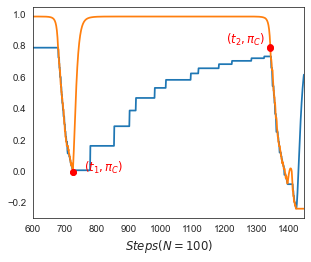

In [13]:
plt.figure(figsize=(5,4), dpi=70)
times=1450
sns.set_style('white')
plt.plot(Agent_N[75].q0_his[600:times],'-',label='$\pi_C$',linewidth=1.8)
plt.plot(Agent_N[75].q1_his[600:times],'-',label='$\pi_D$',linewidth=1.8)
#plt.plot(np.array(n_list[600:times]),'--',label='$n$')

plt.plot(t1-600,Agent_N[11].q0_his[t1],'ro') #QC
plt.plot(t1-600,Agent_N[11].q1_his[t1],'ro') #QD
plt.plot(t2-600,Agent_N[11].q0_his[t2],'ro') #QC
plt.plot(t2-600,Agent_N[11].q1_his[t2],'ro') #QD

#plt.text(760-600,0.53,'$(t_1,n)$',color='red',fontsize=12)
plt.text(760-600,0.,'$(t_1,\pi_C)$',color='red',fontsize=12)
plt.text(1204-600,0.81,'$(t_2,\pi_C)$',color='red',fontsize=12)
#lt.text(1200-600,0.62,'$(t_2,n)$',color='red',fontsize=12)

plt.xlim(0,850)
plt.xticks(list(range(times-600))[::100],list(range(600,1450))[::100])
plt.xlabel('$Steps(N=100)$',font)

#plt.legend(loc= 8)
plt.savefig('A75.pdf')
plt.show()

In [141]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }

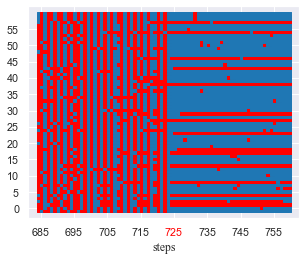

In [97]:
plt.figure( figsize=(5,4), dpi=70)
sns.set()
action_dict={0:'#1f77b4',1:'red'}

for i in range(60):
    for j in range(75):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[685+j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('Agents',font,labelpad=15)
plt.xticks(list(range(75))[::10],list(range(685,760))[::10])
plt.yticks(list(range(60))[::5])
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [4]:
        tl.set_color('red')
plt.savefig('resource-celluar.pdf')
plt.show()

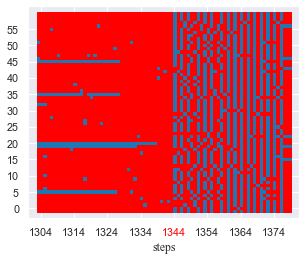

In [100]:
plt.figure( figsize=(5,4), dpi=70)

action_dict={0:'#1f77b4',1:'red'}
for i in range(60):
    for j in range(75):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1304+j]],marker='s',s=80)

plt.xlabel('steps',font)

plt.xticks(list(range(75))[::10],list(range(1304,1379))[::10])
plt.yticks(list(range(60))[::5])
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [4]:
        tl.set_color('red')
plt.savefig('resource-cellular2.pdf')
plt.show()

### supplement information

###(19,679)（725，1344),(1425，2095）（2165，2767)(2825

In [56]:
n1=pd.Series(n_list)
pc=pd.Series(pc_pro)

In [57]:

agent_q0=pd.Series(Agent_N[11].q0_his,name='11_C')
agent_q1=pd.Series(Agent_N[11].q1_his,name='11_D')
agent_action=pd.Series(Agent_N[11].action_history,name='11_A')
agent_r=pd.Series(Agent_N[11].reward_history,name='11_R')

agent0_q0=pd.Series(Agent_N[0].q0_his,name='0_C')
agent0_q1=pd.Series(Agent_N[0].q1_his,name='0_D')
agent0_action=pd.Series(Agent_N[0].action_history,name='0_A')
agent0_r=pd.Series(Agent_N[0].reward_history,name='0_R')

agent_q_df=pd.concat([pc,n1,agent_q0,agent_q1,agent_action,agent_r,agent0_q0,agent0_q1,agent0_action,agent0_r],axis=1)
agent_q_df.columns=['pc','n','11_C','11_D','11_A','11_R','0_C','0_D','0_A','0_R']
agent_q_df.to_csv('agent——q.csv')

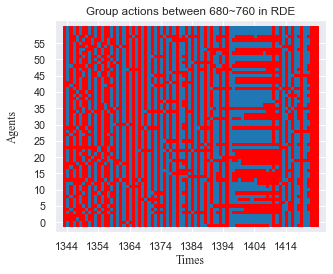

In [61]:
plt.figure( figsize=(5,4), dpi=70)
sns.set()
action_dict={0:'#1f77b4',1:'red'}

for i in range(60):
    for j in range(80):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1344+j]],marker='s',s=80)

plt.xlabel('Times',font)
plt.ylabel('Agents',font,labelpad=15)
plt.xticks(list(range(80))[::10],list(range(1344,1424))[::10])
plt.yticks(list(range(60))[::5])
plt.title('Group actions between 680~760 in RDE')
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s2-cellular.pdf')
plt.show()

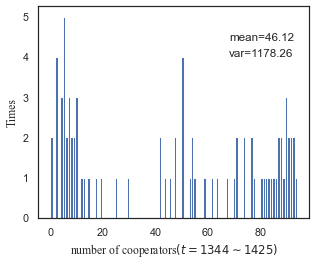

In [72]:
plt.figure(figsize=(5,4), dpi=70)
sns.set_style('white')
nd=np.array( pc_pro[1344:1425])
nd=nd*N
mean=round(nd.mean(),2)
variance=round(nd.var(),2)
plt.hist(nd,bins=100)
plt.xlabel('number of cooperators$(t=1344\sim 1425)$',font)
plt.ylabel('Times',font)

plt.text(68,4.4, 'mean={}'.format(mean), fontsize=12)
plt.text(68,4, 'var={}'.format(variance), fontsize=12)

plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s5-1344RDE.pdf')
plt.show()

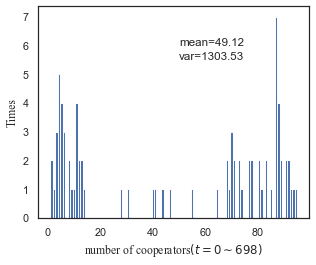

In [77]:
plt.figure(figsize=(5,4), dpi=70)
sns.set_style('white')
nd=np.array(pc_pro[2095:2175])
nd=nd*N
mean=round(nd.mean(),2)
variance=round(nd.var(),2)
plt.hist(nd,bins=100)
plt.xlabel('number of cooperators$(t=0\sim 698)$',font)
plt.ylabel('Times',font)

plt.text(50,6, 'mean={}'.format(mean), fontsize=12)
plt.text(50,5.5, 'var={}'.format(variance), fontsize=12)

plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s6-2095RDE.pdf')
plt.show()

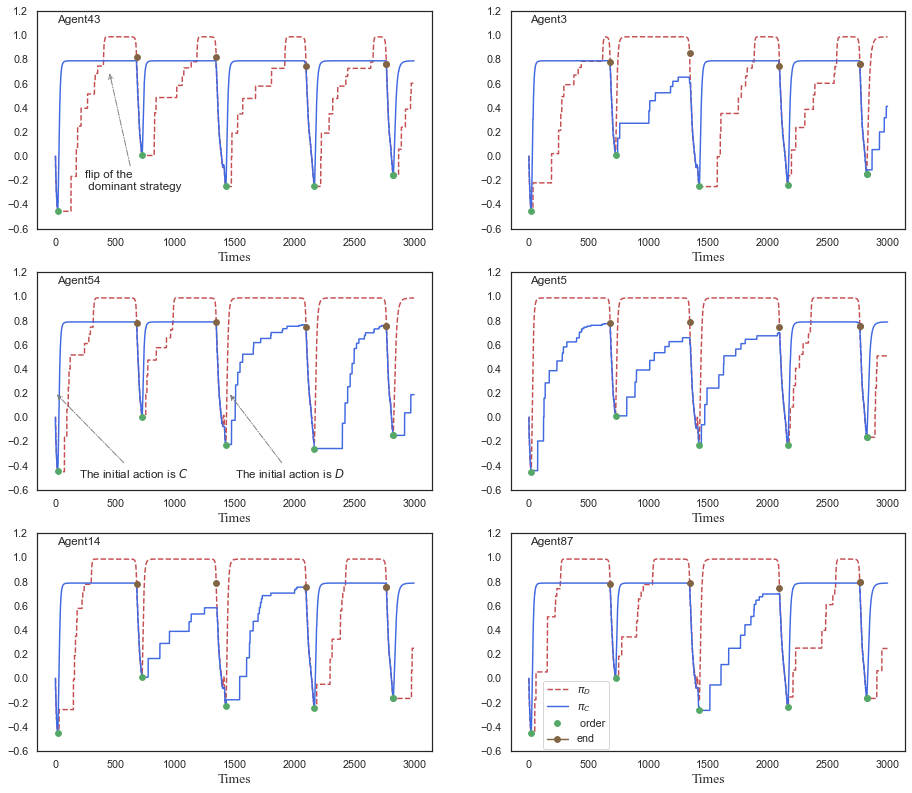

In [140]:
plt.figure(figsize=(16,14), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
fig_agent=[43,3,54,5,14,87]
steps=3000
TT1=[19,725,1425,2165,2825]
TT2=[679,1344,2095,2767]
sns.set_style('white')
for i in range(6):
    index=fig_agent[i]
    agent=Agent_N[index]
    i=i+1
    ax=plt.subplot(3,2,i)
    
    ax.plot(agent.q1_his[:steps],'r--',label='$\pi_D$')
    ax.plot(agent.q0_his[:steps],'royalblue',label='$\pi_C$') 
   
    for tt in TT1:
        ax.plot(tt,agent.q0_his[tt],'go')
        if tt==TT1[-1]:
            ax.plot(tt,agent.q0_his[tt],'go',label=' order')
    for tt in TT2:
        ax.plot(tt,agent.q1_his[tt],color='#806443',marker='o')
        if tt ==TT2[-1]:
            ax.plot(tt,agent.q1_his[tt],color='#806443',marker='o',label='end')
        #ax.text(t2-500+15,agent.q0_his[t2]+0.1,'$t_2$',color='red')
       
    if i==1:
        ax.annotate('flip of the \n dominant strategy', xy=(450,0.7), xytext=(250, -0.28), fontsize=12,
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
    if i==3:
        ax.annotate('The initial action is $D$', xy=(1450,0.2), xytext=(1500, -0.5), fontsize=12,
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
        ax.annotate('The initial action is $C$', xy=(0,0.2), xytext=(200, -0.5), fontsize=12,
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
    
    ax.text(10,1.1,'Agent{}'.format(index))
    ax.set_xlabel('Times',font)
    ax.set_ylim(-0.6,1.2)


plt.legend(loc=(0.08,0.01))

plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s8-Q_RDE.pdf')

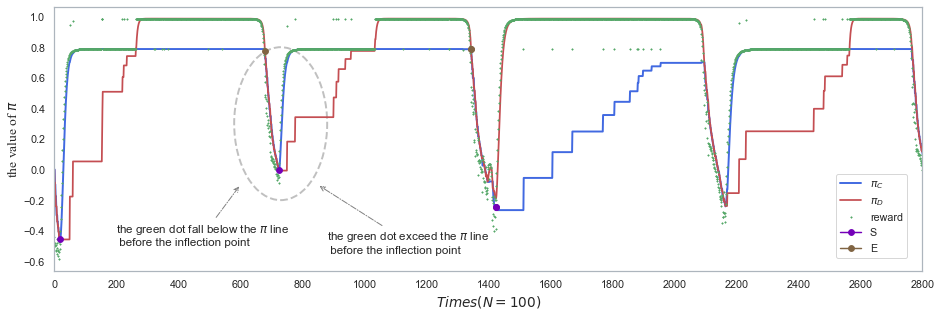

In [256]:
from matplotlib.patches import Ellipse

plt.figure(figsize=(16,5), dpi=70)
sns.set_style('white')
TT1=[19,725,1425]
TT2=[679,1344]
agent=Agent_N[11]
ax0 = plt.subplot(1,1,1)
ax0.plot(Agent_N[index].q0_his[0:times],'-',label='$\pi_C$',linewidth=2,color='royalblue')
ax0.plot(Agent_N[index].q1_his[0:times],'r-',label='$\pi_D$',linewidth=1.8)
ax0.plot(np.array(Agent_N[index].reward_history[0:times]),'g*',markersize=1.5,label='reward')#



for tt in TT1:
        ax0.plot(tt,agent.q0_his[tt],color='#7400b8',marker='o')
        if tt==TT1[-1]:
            ax0.plot(tt,agent.q0_his[tt],color='#7400b8',marker='o',label='S')
for tt in TT2:
        ax0.plot(tt,agent.q1_his[tt],color='#806443',marker='o')
        if tt ==TT2[-1]:
            ax0.plot(tt,agent.q1_his[tt],color='#806443',marker='o',label='E')

ax0.set_xlim(0,950)
ax0.set_xticks(list(range(times))[::200])

ax0.set_xlabel('$Times(N=100)$',font)
ax0.spines['right'].set_color('#adb5bd')
ax0.spines['bottom'].set_color('#adb5bd')
ax0.spines['left'].set_color('#adb5bd')
ax0.spines['top'].set_color('#adb5bd')
ax0.set_ylabel('the value of $\pi$',font)

ellipse = Ellipse(xy=(730,0.3), width=300,height=1,angle=0)    # 旋转角度（逆时针）
ax0.add_patch(p=ellipse)    # 向子区添加形状
ellipse.set( ec='#c0c0c0',ls='--',lw=2,fill=False)
ax0.annotate('the green dot fall below the $\pi$ line \n before the inflection point', xy=(600,-0.1), xytext=(200, -0.5),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
ax0.annotate('the green dot exceed the $\pi$ line \n before the inflection point', xy=(850,-0.1), xytext=(880, -0.55),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
ax0.legend(loc=(0.9,0.05))
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s9-A11Q.pdf')


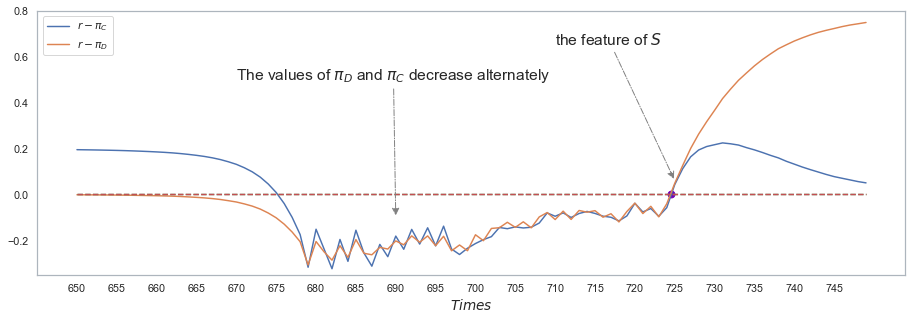

In [304]:
plt.figure(figsize=(16,5), dpi=70)
sns.set_style('white')
ti=750
agent=Agent_N[11]
ax1 = plt.subplot(1,1,1)
ax1.plot(np.array(agent.reward_history[650:ti])-np.array(agent.q0_his[650:ti]),label='$r-\pi_C$')
ax1.plot(np.array(agent.reward_history[650:ti])-np.array(agent.q1_his[650:ti]),label='$r-\pi_D$')

ax1.plot(list(range(ti-650)),[0.]*(ti-650),'--')
ax1.set_xticks(list(range(100))[::5])
ax1.set_xticklabels(list(range(650,750))[::5])
ax1.set_ylim(-0.35,0.8)

ax1.set_xlabel('$Times$',font)
ax1.spines['right'].set_color('#adb5bd')
ax1.spines['bottom'].set_color('#adb5bd')
ax1.spines['left'].set_color('#adb5bd')
ax1.spines['top'].set_color('#adb5bd')
ax1.annotate('the feature of $S$', xy=(75,0.06), xytext=(60, 0.65), fontsize=16,
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))

ax1.annotate('The values of $\pi_D$ and $\pi_C$ decrease alternately', xy=(40,-0.1), xytext=(20, 0.5), fontsize=16,
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))



ax1.plot(list(range(100)),[0.]*100,'--')


ax1.scatter(74.5,0,color='#7400b8',s=50)



ax1.legend(loc=2)
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s10-feature of.pdf')

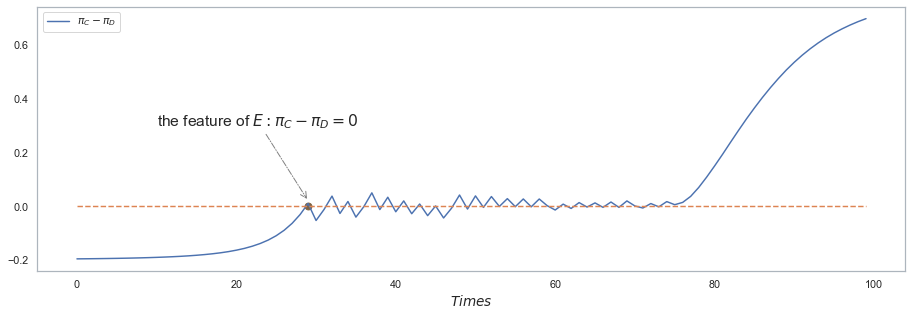

In [305]:
plt.figure(figsize=(16,5), dpi=70)
sns.set_style('white')
ax1 = plt.subplot(1,1,1)
agent=Agent_N[11]
ax1.plot(np.array(agent.q0_his[650:750])-np.array(agent.q1_his[650:750]),label='$\pi_C-\pi_D$')
ax1.annotate('the feature of $E:\pi_C-\pi_D=0$', xy=(29,0.02), xytext=(10, 0.3), fontsize=16,
             arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))
ax1.plot(list(range(100)),[0.]*100,'--')
ax1.scatter(679-650,0,color='#806443',s=50)
ax1.spines['right'].set_color('#adb5bd')
ax1.spines['bottom'].set_color('#adb5bd')
ax1.spines['left'].set_color('#adb5bd')
ax1.spines['top'].set_color('#adb5bd')
ax1.set_xlabel('$Times$',font)
ax1.legend(loc=2)
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s11-feature of.pdf')

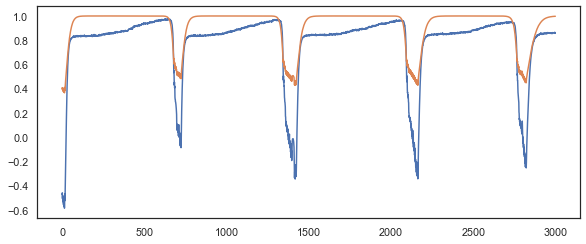

In [242]:
plt.figure( figsize=(10,4), dpi=70)

plt.plot(list(range(times)), r_list[:times],label='$p_C$')
plt.plot(list(range(times)), n_list[:times],label='$p_C$')
#plt.plot(np.array(Agent_N[75].reward_history[:times]),'-.')
#plt.xticks(list(range(times))[::100],rotation=60)
plt.show()

In [ ]:
plt.figure(figsize=(16,5), dpi=70)
sns.set_style('white')

agent=Agent_N[11]
ax0 = plt.subplot(1,1,1)
plt.plot(Agent_N[11].q0_his[:times],'royalblue')
plt.plot(Agent_N[11].q1_his[:times],'--')
plt.plot(np.array(n_list[:times]),'-.',label='$p_C$')

#plt.yticks(np.arange(0.2,1,0.1))
plt.xticks(list(range(times))[::200],rotation=60)

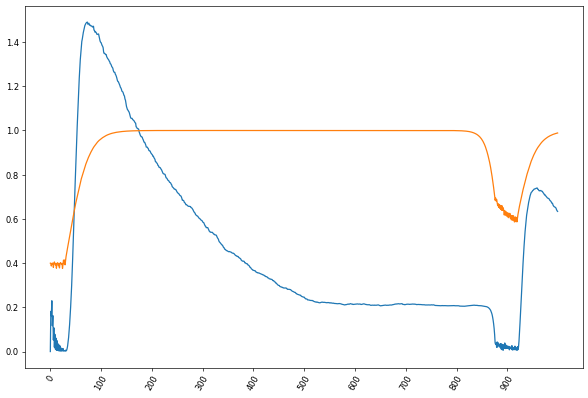

In [56]:
plt.figure(figsize=(12,8), dpi=60)
time=1000
abs_q=0
for agent in Agent_N:
    abs_q+=abs(np.array(agent.q0_his)-np.array(agent.q1_his))
    
abs_q=abs_q/N  
plt.plot(list(range(time)),abs_q[:time])   
plt.plot(list(range(time)),n_list[:time]) 
#plt.plot(list(range(time)), pc_pro[:time],label='$p_C$')
plt.xticks(list(range(time))[::100],rotation=60)
plt.show()

In [47]:
abs_q[860:880]

array([0.20216785, 0.20117352, 0.19986946, 0.19820523, 0.1960219 ,
       0.193612  , 0.19056428, 0.18693843, 0.18160571, 0.175043  ,
       0.1672595 , 0.15625834, 0.14263798, 0.12563577, 0.1047986 ,
       0.07672565, 0.03842745, 0.0326388 , 0.03828452, 0.0193604 ])

In [323]:
agent_q0=pd.Series(Agent_N[1].q0_his)
agent_q1=pd.Series(Agent_N[1].q1_his)
agent_action=pd.Series(Agent_N[1].action_history)
agent_r=pd.Series(Agent_N[1].reward_history)
pc=pd.Series(pc_pro)
nl=pd.Series(n_list)
agent_q_df=pd.concat([pc,nl,agent_q0,agent_q1,agent_action,agent_r],axis=1)
agent_q_df.to_csv('agent1——q.csv',header=None)

In [220]:
agent_q0=pd.Series(Agent_N[10].q0_his)
agent_q1=pd.Series(Agent_N[10].q1_his)
agent_action=pd.Series(Agent_N[10].action_history)
agent_r=pd.Series(Agent_N[10].reward_history)
agent_q_df=pd.concat([agent_q0,agent_q1,agent_action,agent_r],axis=1)
agent_q_df.to_csv('agent10——q.csv',header=None)

### 加入概率很低的随机惩罚

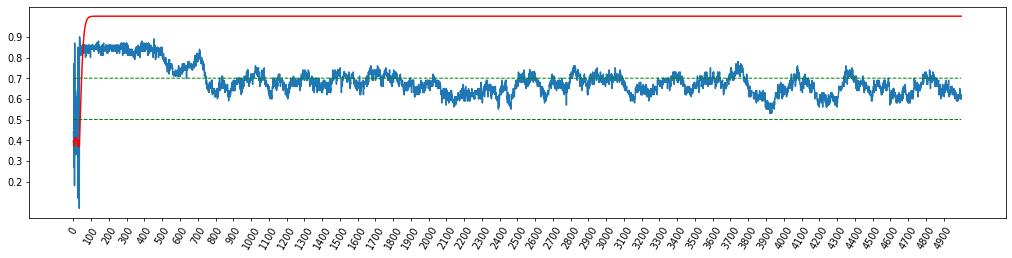

In [333]:

#np.random.seed(12)
colors = ['r--', 'g-', 'b-.', 'y:']
c=0.2
total_round =5000
N = 100
n=0.4
deltan_list=[]

n_list=[]
pc_pro=[]
e=0.3
Agent_N = [Agent(learning_rate=0.2,
                 policy='e_greedy',
                 epsilon=0.04)
           for _ in range(N)]

for j in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    pc=round(1-sum(action_N)/N,6)
    pc_pro.append(pc)
    deltan=e*n*(1-n)*(pc-0.5)

    n=n+deltan
    n_list.append(n)
    deltan_list.append(deltan)

    for agent in Agent_N:
        if agent.action == 0 :
            agent.reward = (2.-cost)/(1.0+np.exp(-15*(n-0.6)))-1
        elif np.random.rand()<0.01:
            agent.reward = -1
        else:
            agent.reward = 2./(1.0+np.exp(-15*(n-0.6)))-1
        agent.RL()
plt.figure(figsize=(18,4),dpi=70)

plt.plot(list(range(total_round)), pc_pro,color='#1f77b4',label='$p_C$')
plt.plot(list(range(total_round)), n_list,color='r',label='$p_C$')
plt.plot(list(range(total_round)), [0.5] * int(total_round), 'g--',linewidth=1)
plt.plot(list(range(total_round)), [0.7] * int(total_round), 'g--',linewidth=1)
plt.yticks(np.arange(0.2,1,0.1))
plt.xticks(list(range(total_round))[::100],rotation=60)
plt.show()


## 二、其他环境函数

In [29]:

#np.random.seed(1234)
colors = ['r--', 'g-', 'b-.', 'y:']
c=0.2
total_round =3000
N = 100
n_list=[]
pc_pro=[]
k1=0.1
k2=0.1
deltan_list=[]
n=0.3#np.random.rand()
Agent_N = [Agent(learning_rate=0.1,
                 policy='boltzman',
                 temp=0.01)   for _ in range(N)]

for j in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    pc=round(1-sum(action_N)/N,6)
    pc_pro.append(pc)
    if pc>0.5:
        deltan=k1*(1-n)*(pc-0.5)
    elif pc<0.6:
        deltan=k2*n*(pc-0.5)
    
    n=n+deltan
    deltan_list.append(deltan)
    n_list.append(n)
    for agent in Agent_N:
        if agent.action == 0 :
            agent.reward = 2*n-1-n*c
       # elif np.random.rand()<0.005:
           # agent.reward = -1
        else:
            agent.reward = 2*n-1
        agent.RL()



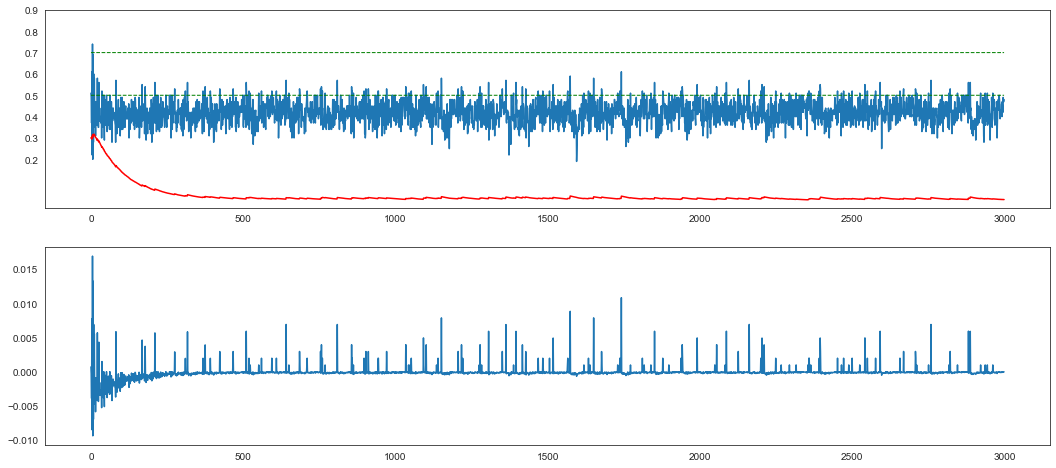

In [30]:
plt.figure(figsize=(18,8))
times=3000
plt.subplot(2,1,1)
plt.plot(list(range(total_round)[:times]), pc_pro[:times],color='#1f77b4',label='$p_C$')
plt.plot(list(range(total_round)[:times]), n_list[:times],color='r',label='$p_C$')
plt.plot(list(range(total_round)[:times]), [0.5] * int(times), 'g--',linewidth=1)
plt.plot(list(range(total_round)[:times]), [0.7] * int(times), 'g--',linewidth=1)
plt.yticks(np.arange(0.2,1,0.1))
#plt.xticks(list(range(total_round)))
plt.subplot(2,1,2)
plt.plot(list(range(total_round)[:times]), deltan_list[:times],color='#1f77b4',label='$p_C$')

#plt.xticks(list(range(total_round)))
plt.show()

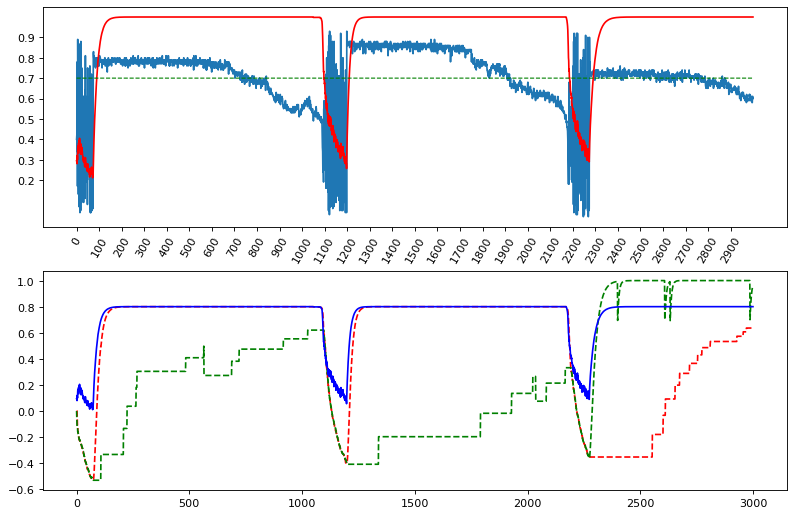

In [337]:
plt.figure(figsize=(12,8), dpi=80)
times=3000
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
plt.subplot(2,1,1)
plt.plot(list(range(times)), pc_pro[:times],color='#1f77b4',label='$p_C$')
plt.plot(list(range(times)), n_list[:times],color='r',label='$p_C$')
plt.plot(list(range(times)), [0.7] * int(times), 'g--',linewidth=1)

plt.yticks(np.arange(0.2,1,0.1))
plt.xticks(list(range(total_round))[:times:100],rotation=60)
plt.subplot(2,1,2)
plt.plot(Agent_N[10].q0_his[:times],'r--')
plt.plot(Agent_N[10].q1_his[:times],'g--')
plt.plot(list(range(times)), np.array(n_list[:times])-0.2,color='b',label='$p_C$')
plt.show()

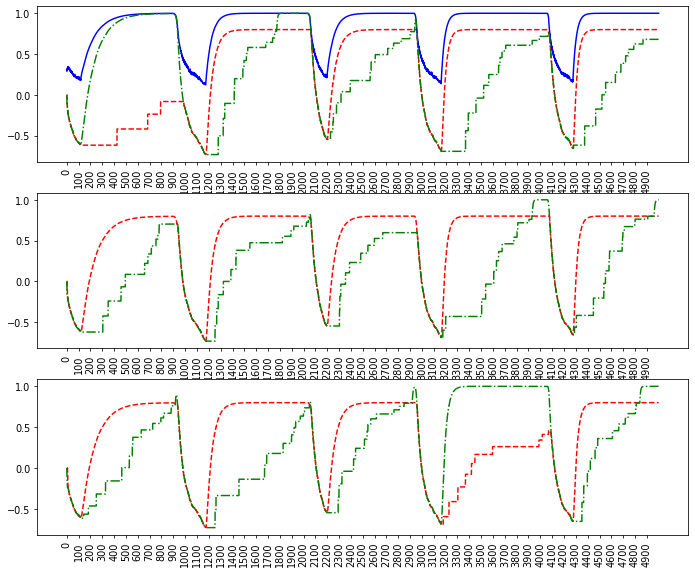

In [286]:

plt.figure(figsize=(12,10), dpi=70)
times=5000
plt.subplot(3,1,1)
plt.plot(Agent_N[10].q0_his[:times],'r--')
plt.plot(list(range(times)), n_list[:times],color='b',label='$p_C$')

plt.plot(Agent_N[10].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)

plt.subplot(3,1,2)
plt.plot(Agent_N[0].q0_his[:times],'r--')
plt.plot(Agent_N[0].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)

plt.subplot(3,1,3)
plt.plot(Agent_N[2].q0_his[:times],'r--')
plt.plot(Agent_N[2].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)
plt.show()

In [35]:
np.random.seed(1234)
colors = ['r--', 'g-', 'b-.', 'y:']
cost = 0.2
total_round =8000
N = 80
T=0.7
envs = MarjorityGame(N,T)
envs.reset()

Agent_N = [Agent(learning_rate=0.15,
                 policy='e_greedy',
                 epsilon=0.03)
           for _ in range(N)]

for _ in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    round_r = envs.step(action_N)
    for agent in Agent_N:
        if agent.action == 0 and round_r >0 :
            agent.reward = round_r - cost
        else:
            agent.reward = round_r
        agent.RL()

### 三、囚徒困境

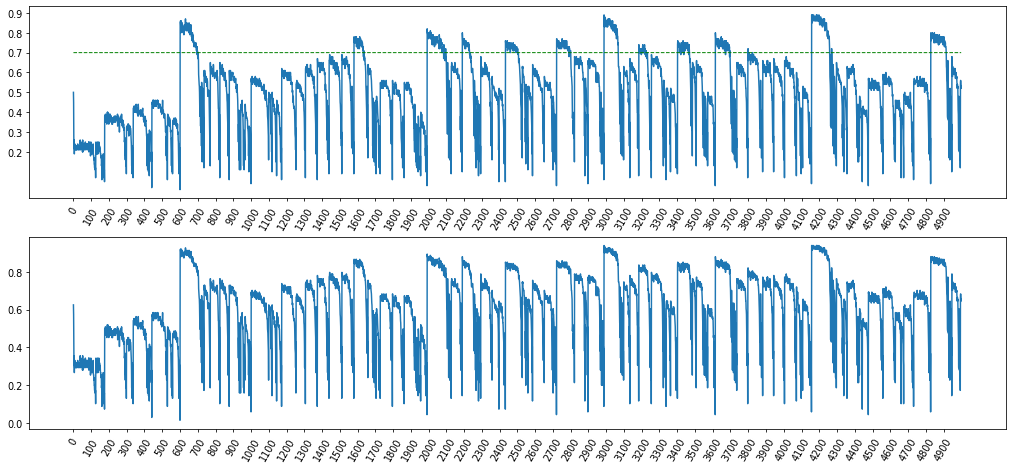

In [318]:

np.random.seed(12)
colors = ['r--', 'g-', 'b-.', 'y:']

total_round =5000
N = 100
b=1.5

pc_pro=[]

r_list=[]
Agent_N = [Agent(learning_rate=0.2,
                 policy='e_greedy',
                 epsilon=0.04)
           for _ in range(N)]

for j in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    pc=round(1-sum(action_N)/N,6)
    pc_pro.append(pc)
    r=0
    for agent in Agent_N:
        if agent.action == 0 :
            agent.reward = pc
        else:
            agent.reward = b*pc
        r+=agent.reward
        agent.RL()
    r_list.append(r/N)
plt.figure(figsize=(18,8),dpi=70)
plt.subplot(2,1,1)
plt.plot(list(range(total_round)), pc_pro,color='#1f77b4',label='$p_C$')

plt.plot(list(range(total_round)), [0.7] * int(total_round), 'g--',linewidth=1)
plt.yticks(np.arange(0.2,1,0.1))
plt.xticks(list(range(total_round))[::100],rotation=60)
plt.subplot(2,1,2)
plt.plot(list(range(total_round)), r_list,color='#1f77b4',label='$p_C$')

plt.xticks(list(range(total_round))[::100],rotation=60)
plt.show()


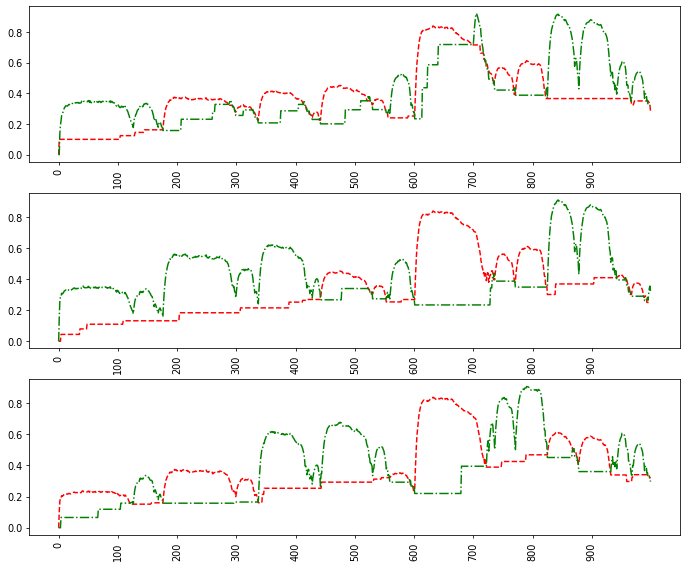

In [322]:

plt.figure(figsize=(12,10), dpi=70)
times=1000
plt.subplot(3,1,1)
plt.plot(Agent_N[10].q0_his[:times],'r--')


plt.plot(Agent_N[10].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)

plt.subplot(3,1,2)
plt.plot(Agent_N[0].q0_his[:times],'r--')
plt.plot(Agent_N[0].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)

plt.subplot(3,1,3)
plt.plot(Agent_N[2].q0_his[:times],'r--')
plt.plot(Agent_N[2].q1_his[:times],'g-.')
plt.xticks(list(range(times))[::100],rotation=90)
plt.show()

In [49]:
#round_r=2./(1.0+np.exp(-15*(nc-0.5)))-1 ====> 0.6446488999999949
#
#np.random.seed(1234)

colors = ['r--', 'g-', 'b-.', 'y:']
#punish=5
total_round =10000
N =100
b=1.2
pc_list=[]
k_list=[]
for i in range(10):
    env = MarjorityGame(N)
    env.reset()

    Agent_N = [Agent(learning_rate=0.1,
                     policy='e_greedy',
                     epsilon=0.03)
               for _ in range(N)]

    for _ in range(total_round):
        action_N = [agent.choose_action() for agent in Agent_N]
        round_r = env.step(action_N)
        #print(round_r)
        for agent in Agent_N:
            agent.reward=round_r
            if agent.action==1 and round_r>0:
                agent.reward*=b
            agent.RL()
    pc_list.append(sum(env.pc_pro)/total_round)
print(np.array(pc_list).mean())

0.660621699999987


In [ ]:
plt.figure(figsize=(15,5), dpi=70)
#plt.subplot(2,1,1)
plt.plot(list(range(total_round)), env.pc_pro)
plt.axhline(0.7,c='y',ls='-.',lw=2)
plt.axhline(0.5,c='r',ls='--',lw=2)
plt.ylim(0,1)
plt.xticks(list(range(total_round))[::250],rotation=90)
#plt.subplot(2,1,2)       
#plt.plot(list(range(total_round)),env.r_list)   
#plt.xticks(list(range(total_round))[::250],rotation=90)
plt.show()

In [96]:
for pc, r in zip(env.pc_pro[:30],env.r_list[:30]):
    print(pc,r)


0.56 0.29131261245159124
0.48 -0.0996679946249559
0.54 0.19737532022490423
0.42000000000000004 -0.3799489622552247
0.30000000000000004 -0.7615941559557649
0.62 0.5370495669980351
0.62 0.5370495669980351
0.5800000000000001 0.37994896225522523
0.62 0.5370495669980351
0.6 0.4621171572600098
0.6 0.4621171572600098
0.62 0.5370495669980351
0.5800000000000001 0.37994896225522523
0.6 0.4621171572600098
0.56 0.29131261245159124
0.6 0.4621171572600098
0.5800000000000001 0.37994896225522523
0.5800000000000001 0.37994896225522523
0.62 0.5370495669980351
0.6 0.4621171572600098
0.5800000000000001 0.37994896225522523
0.5800000000000001 0.37994896225522523
0.64 0.6043677771171636
0.6 0.4621171572600098
0.6 0.4621171572600098
0.6 0.4621171572600098
0.62 0.5370495669980351
0.6 0.4621171572600098
0.5800000000000001 0.37994896225522523
0.56 0.29131261245159124


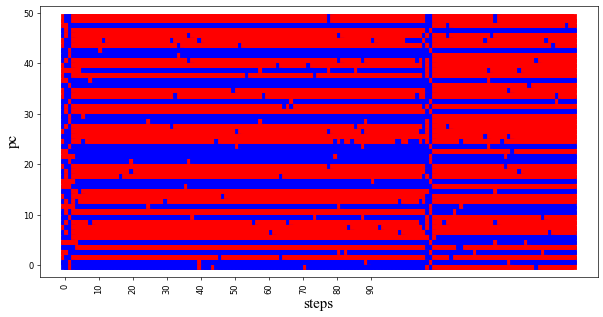

In [110]:
 plt.figure( figsize=(15,6), dpi=60)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 18,
        }
action_dict={0:'red',1:'blue'}

for i in range(N):
    for j in range(150):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('pc',font)
plt.xticks(list(range(150))[::10],list(range(150))[::10],rotation=90)
plt.show()

In [ ]:
 plt.figure( figsize=(12,6), dpi=60)

action_dict={0:'red',1:'blue'}

for i in range(N):
    for j in range(150):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[150j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('pc',font)
plt.xticks(list(range(150))[::10],list(range(150))[::10],rotation=90)
plt.show()

In [ ]:
pc_df=pd.DataFrame(env.pc_pro)
pc_df.to_csv('env_pc_1.csv',header=None)

In [ ]:
q_pd=pd.Series(abs_q_list)
state_pd=pd.Series(env.state_list)
df=pd.concat([q_pd,state_pd],axis=1)
df.columns=['q','state']

df.to_csv('q_state_1.csv',header=None)

In [ ]:
# 某一时刻累加所有的agent的abs q值
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,5), dpi=60)
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.hist(df[1320:2303].q,bins=50)
#ax1.set_xlim(0,0.1)
ax2.hist(df[2303:3048].q,bins=50)
ax2.set_xlim(0,2)
ax3.hist(df[3048:3598].q,bins=50)
ax2.set_xlim(0,2)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,5), dpi=60)
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.hist(df[3598:3940].q,bins=50)

ax2.set_xlim(0,2)
ax2.hist(df[3940:4867].q,bins=50)
ax3.hist(df[4867:5473].q,bins=50)
ax3.set_xlim(0,1)
plt.show()

In [ ]:
fig= plt.figure( figsize=(14,16), dpi=70)
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)

ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
ax1.plot(Agent_N[0].q0_his[:3700],'r-')
ax1.plot(Agent_N[0].q1_his[:3700],'g--') 
ax1.set_xticks(list(range(3700))[::100])
ax1.set_xticklabels(list(range(3700))[::100],rotation=90) 

ax1.set_ylabel('Q_0',rotation=0)

ax1.plot(2303-2300,0.304,'bo')
ax1.plot(3048-2300,0.304,'bo')
ax1.plot(3598-2300,0.304,'bo')


In [ ]:
fig= plt.figure( figsize=(14,16), dpi=70)
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)

ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
ax1.plot(Agent_N[0].q0_his[2300:3700],'r-')
ax1.plot(Agent_N[0].q1_his[2300:3700],'g--') 
ax1.set_xticks(list(range(1400))[::100])
ax1.set_xticklabels(list(range(2300,3700))[::100],rotation=90) 

ax1.set_ylabel('Q_0',rotation=0)

ax1.plot(2303-2300,0.304,'bo')
ax1.plot(3048-2300,0.304,'bo')
ax1.plot(3598-2300,0.304,'bo')



ax2.plot(Agent_N[1].q0_his[2300:3700],'r-')
ax2.plot(Agent_N[1].q1_his[2300:3700],'g--') 
ax2.set_xticks(list(range(1400))[::100])
ax2.set_xticklabels(list(range(2300,3700))[::100],rotation=90) 

ax2.set_ylabel('Q_1',rotation=0)

ax2.plot(2303-2300,0.304,'bo')
ax2.plot(3048-2300,0.304,'bo')
ax2.plot(3598-2300,0.304,'bo')



ax3.plot(Agent_N[2].q0_his[2300:3700],'r-')
ax3.plot(Agent_N[2].q1_his[2300:3700],'g--') 
ax3.set_xticks(list(range(1400))[::100])
ax3.set_xticklabels(list(range(2300,3700))[::100],rotation=90) 

ax3.set_ylabel('Q_2',rotation=0)

ax3.plot(2303-2300,0.304,'bo')
ax3.plot(3048-2300,0.304,'bo')
ax3.plot(3598-2300,0.304,'bo')

ax4.plot(np.array(Agent_N[2].q0_his[2300:3700])-np.array(Agent_N[2].q1_his[2300:3700]),'r-')

ax4.set_xticks(list(range(1400))[::100])
ax4.set_xticklabels(list(range(2300,3700))[::100],rotation=90) 

ax4.set_ylabel('Q_2',rotation=0)

ax4.plot(2303-2300,0.304,'bo')
ax4.plot(3048-2300,0.304,'bo')
ax4.plot(3598-2300,0.304,'bo')




plt.show()

In [ ]:
fig= plt.subplots(1, 1, figsize=(12,6), dpi=60)
action_dict={0:'red',1:'blue'}

for i in range(N):
    for j in range(100):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[2300+j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('pc',font)
plt.xticks(list(range(100))[::5],list(range(2300,2400))[::5],rotation=90)
plt.yticks(list(range(60))[::5])
plt.show()

In [ ]:
fig= plt.subplots(1, 1, figsize=(12,6), dpi=60)
action_dict={0:'red',1:'blue'}

for i in range(N):
    for j in range(100):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[3550+j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('pc',font)
plt.xticks(list(range(100))[::10],list(range(3550,3650))[::10],rotation=90)
plt.show()

### 输出整体env值

In [ ]:
agent_q0=pd.Series(Agent_N[0].q0_his)
agent_q1=pd.Series(Agent_N[0].q1_his)
agent_q_df=pd.concat([agent_q0,agent_q1],axis=1)
agent_q_df.to_csv('agent0_q.csv',header=None)
agent_q0=pd.Series(Agent_N[1].q0_his)
agent_q1=pd.Series(Agent_N[1].q1_his)
agent_q_df=pd.concat([agent_q0,agent_q1],axis=1)
agent_q_df.to_csv('agent1_q.csv',header=None)

In [ ]:
agent_q0=pd.Series(Agent_N[23].q0_his)
agent_q1=pd.Series(Agent_N[23].q1_his)
agent_action=pd.Series(Agent_N[23].action_history)
agent_q_df=pd.concat([agent_q0,agent_q1,agent_action],axis=1)
agent_q_df.to_csv('agent23_q.csv',header=None)

In [ ]:
agent_q0=pd.Series(Agent_N[25].q0_his)
agent_q1=pd.Series(Agent_N[25].q1_his)
agent_action=pd.Series(Agent_N[25].action_history)
agent_q_df=pd.concat([agent_q0,agent_q1,agent_action],axis=1)
agent_q_df.to_csv('agent25——q.csv',header=None)

In [ ]:
fig= plt.figure( figsize=(14,20), dpi=70)
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)
ax3=fig.add_subplot(4,1,3)
#ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
ax1.plot(Agent_N[22].q0_his[3850:4500],'r-')
ax1.plot(Agent_N[22].q1_his[3850:4500],'g--') 
ax1.set_xticks(list(range(650))[::20])
ax1.set_xticklabels(list(range(3850,4500))[::20],rotation=90)
ax1.set_ylabel('Q_22',rotation=0)
ax1.plot(3960-3850,-1,'ro')
ax1.plot(3970-3850,-1,'ro')



ax2.plot(Agent_N[23].q0_his[3850:4500],'r-')
ax2.plot(Agent_N[23].q1_his[3850:4500],'g--') 
ax2.set_xticks(list(range(650))[::20])
ax2.set_xticklabels(list(range(3850,4500))[::20],rotation=90)
ax2.set_ylabel('Q_23',rotation=0)
ax2.plot(3960-3850,-1,'ro')
ax2.plot(3970-3850,-1,'ro')

ax3.plot(np.array(Agent_N[22].q0_his[3850:4500])-np.array(Agent_N[22].q1_his[3850:4500]),'g-')
ax3.set_xticks(list(range(650))[::20])
ax3.set_xticklabels(list(range(3850,4500))[::20],rotation=90) 
ax4.plot(np.array(Agent_N[23].q0_his[3850:4500])-np.array(Agent_N[23].q1_his[3850:4500]),'g-')
ax4.set_xticks(list(range(650))[::20])
ax4.set_xticklabels(list(range(3850,4500))[::20],rotation=90) 

plt.show()

In [ ]:

def C(n,k):   #求n中选出k的组合值
    res = 1
    for i in range(k):
        res *= n / k
        k -= 1
        n -= 1
    return res

Ntbiao=dict()
for N in range(10,60):
    Ntbiao[N]=[]

for N in range(10,60):
    fenmu=pow(2,N)
    for t in range(50,90):
        TT=int(t/100.*N)
        sum=0
        for k in range(TT,N):
            sum+=C(N,k)
        
        Ntbiao[N].append(sum/fenmu) 
df=pd.DataFrame(Ntbiao).T

df.columns=np.arange(0.5,0.9,0.01)
df.head()
df.to_csv('ntbiao.csv')

In [ ]:
fig= plt.subplots(1, 1, figsize=(16, 8), dpi=60)

plt.plot(list(range(8000,8500)), env.r_list[8000:8500],'g')
plt.xlabel('time of round')
plt.ylabel('pauoff')
plt.xticks(list(range(8000,8500))[::10],rotation=90)
plt.show()

In [ ]:
q0_874=[]
q1_874=[]
for i in range(30):
    q0_874.append(Agent_N[i].q0_his[874])
    q1_874.append(Agent_N[i].q1_his[874])
df874_q0=pd.Series(q0_874)
df874_q1=pd.Series(q1_874)
df874_q_df=pd.concat([df875_q0,df875_q1],axis=1)
df874_q_df.columns=['c','d']
df874_q_df.to_csv('874_q.csv')

In [ ]:
df874_q_df[df874_q_df.c>df874_q_df.d].count()

In [ ]:
env.pc_pro[875]

In [ ]:
q0_875=[]
q1_875=[]
for i in range(30):
    q0_875.append(Agent_N[i].q0_his[875])
    q1_875.append(Agent_N[i].q1_his[875])
df875_q0=pd.Series(q0_875)
df875_q1=pd.Series(q1_875)
df875_q_df=pd.concat([df875_q0,df875_q1],axis=1)
df875_q_df.columns=['c','d']
df875_q_df.to_csv('875_q.csv')

In [ ]:
df875_q_df[df875_q_df.c>df875_q_df.d].count()

In [ ]:
q0_876=[]
q1_876=[]
for i in range(30):
    q0_876.append(Agent_N[i].q0_his[876])
    q1_876.append(Agent_N[i].q1_his[876])
df876_q0=pd.Series(q0_876)
df876_q1=pd.Series(q1_876)
df876_q_df=pd.concat([df876_q0,df876_q1],axis=1)
df876_q_df.columns=['c','d']
df876_q_df.to_csv('876_q.csv',header=None)

In [ ]:
df876_q_df[df876_q_df.c>df876_q_df.d].count()

In [ ]:
import pandas as pd
df=pd.concat([pd.Series(Agent_N[5].q0_his[:300]),pd.Series(Agent_N[5].q1_his[:300])],axis=1)
df.iloc[105:130]